In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch10. N차원 배열(Numpy 배열) 다루기</font></b>
- [numpy](http://www.numpy.org)
- [numpy docs](https://numpy.org/doc/stable)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)
# 1절 넘파이 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [4]:
# np.arange(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
a = np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [24]:
from numpy import arange
a = arange(15,
          #dtype=np.int32
          ).reshape(3, 5) # 3행5열짜리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [25]:
type(a) # a변수의 타입

numpy.ndarray

In [26]:
a.dtype # a배열의 요소들의 type

dtype('int32')

In [27]:
a.dtype.name

'int32'

In [28]:
a.itemsize # a배열안의 한 요소의 bytesize

4

In [29]:
a.ndim # 축수(차원수)

2

In [31]:
a.size # 배열 요소의 갯수

15

In [32]:
a.shape # 배열의 구조(3행5열)

(3, 5)

In [35]:
print('shape 조정 전 a\n', a)
a.shape = (5, 3)
print('shape 조정 후 a\n',a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [37]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
a.size # 요소갯수

12

In [40]:
a.dtype

dtype('int32')

In [41]:
a.itemsize

4

In [43]:
a.dtype = np.int64 # 읽을 때 int64로(64bit씩) 읽는다
a.dtype

dtype('int64')

In [44]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [46]:
a.itemsize

8

In [47]:
a.size

6

In [54]:
# 배열요소의 타입을 수정
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [57]:
a = a.astype('int64')
#a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [56]:
a.itemsize

8

In [58]:
a.size

12

In [59]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [60]:
a.ravel() # flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [62]:
a.flatten() # 함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장
- pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷, io속도 개선)

In [63]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [71]:
%%time
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a, f)

CPU times: total: 0 ns
Wall time: 0 ns


In [72]:
%%time
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)

CPU times: total: 0 ns
Wall time: 964 µs


In [66]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [73]:
%%time
np.save('data/ch10.npy', a) # 저장

CPU times: total: 0 ns
Wall time: 998 µs


In [74]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 1.99 ms


# 2절 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty....linspace
- 랜덤값을 갖는 함수들 : np.random.~
## 2.1 array()함수로 넘파이 배열 만들기
    - array(obj, dtype=np.xx나 'xx', copy=T/F)

In [76]:
a = np.array([2, 4, 6], dtype=np.int16) # 정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [77]:
a[0], a[1], a[2]

(2, 4, 6)

In [78]:
for i in a:
    print(i, end='\t')

2	4	6	

In [91]:
b = np.array([ [1.5, 2.3],  # 배열은 동일 자료형의 집합 : 정수->실수->문자
               [4,   5]])
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [87]:
b[0][1], b[0,1] # 2차원 [axis0행, axis1열]

(2.3, 2.3)

In [89]:
l = [ [1.5, 2.3],  [4,   5]]
l[0][1]

2.3

In [93]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [95]:
b = b.astype(np.float32) # 함수의 결과를 return하면 a는 그대로
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [97]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

float32
4


In [101]:
for row in b:
    for item in row:
        print(item, end='\t')
    print() # 개행

1.5	2.3	
4.0	5.0	


In [105]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {:.1f}({:.1f})'.format(i, j, item, b[i,j]), end='\t')
    print() # 개행

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [107]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5], [6,7,8,9,0],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [108]:
b[0,1] #없는 인덱싱시 에러 ex. b[3,0]

2

In [125]:
print('0~1행, 1~2열 :\n', b[0:2, 1:3]) 
print('2행모두(1차원) :', b[2, :], b[2])      #특정행, 모든열을 추출할 경우, 열생략 가능
print('2행모두(2차원) :', b[2:3, :], b[2:3])
print('4열모두(1차원) :', b[:,4], b[...,4], b[:, -1]) # 특정열, 모든행을 추출할 경우
print('2행 0~3열 :', b[2, 0:-1])
print('마지막열 제외 :\n', b[:, :-1])

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열모두(1차원) : [ 5  0 15] [ 5  0 15] [ 5  0 15]
2행 0~3열 : [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [7]:
# 스칼라 변수
a = 10
copy_a = a # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a = -1
print(f"a={a}, 복제본{copy_a}")

a=10, 복제본10
a=10, 복제본-1


In [9]:
# 데이터 구조
a = [0, 1]
copy_a = a.copy() # 깊은 복사
print(f"a={a}, 복제본{copy_a}")
copy_a[0] = -1
print(f"a={a}, 복제본{copy_a}")

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [17]:
# numpy 배열
import numpy as np
c = np.array([ [1,2], [3,4] ])
#d = c # 주소 할당
d = np.array(c, copy=True) # 깊은 복사 ; d = c.copy()동일
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1887853685392 1887853684048
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype속성을 따로 지정 가능

In [25]:
x = np.zeros( (3,) ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [31]:
x = np.zeros( (2, 5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [34]:
np.ones( (2,5), dtype=np.uint8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [38]:
np.full( (2,3), -1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

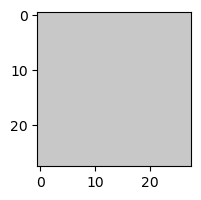

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기 figsize=(가로, 세로)
img = np.full( (28,28), 200, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)